## Программирование на основе массивов
С помощью массивов NumPy многие виды обработки данных можно записать очень крско, не прибегая к циклам. Такой способ обычно называют *векторизацией*.

В качестве простого примера предположим, что нужно вычислить функцию `sqrt(x^2 + y^2) на *регулярной сетке*. 
Регулярная сетка - это упорядоченная структура данных, где точки расположены **с постоянным шагом** по каждому измерению.

In [1]:
import numpy as np

rng = np.random.default_rng()

In [2]:
points = np.arange(-5, 5, 0.1) # 100 равностоящих точек
xs, ys = np.meshgrid(points, points)
xs, ys

(array([[-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        ...,
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9]], shape=(100, 100)),
 array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
        [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
        [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
        ...,
        [ 4.7,  4.7,  4.7, ...,  4.7,  4.7,  4.7],
        [ 4.8,  4.8,  4.8, ...,  4.8,  4.8,  4.8],
        [ 4.9,  4.9,  4.9, ...,  4.9,  4.9,  4.9]], shape=(100, 100)))

In [3]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.00071425, 6.93108938, ..., 6.86221539, 6.93108938,
        7.00071425],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       ...,
       [6.86221539, 6.78969808, 6.71788657, ..., 6.64680374, 6.71788657,
        6.78969808],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646]], shape=(100, 100))

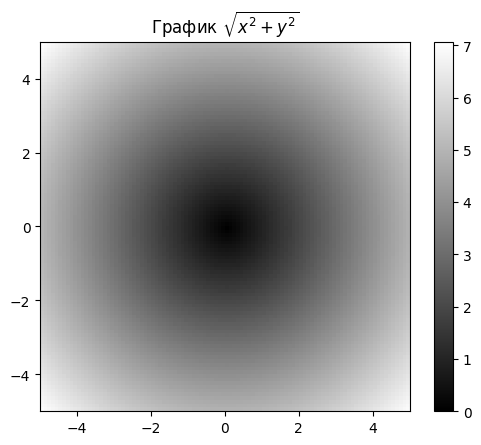

In [4]:
import matplotlib.pyplot as plt
plt.title("График $\\sqrt{x^2 + y^2}$")
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()


### Запись логических условий в виде операций с массивами
Функция `np.where` - векторный вариант тернарного выражения `x if condition else y`. Пусть имеется булев массив и два массива значений:

In [5]:
xarr = np.linspace(1.1, 1.5, 5) # linspace включает крайнее значение stop
yarr = np.linspace(2.1, 2.5, 5)
cond = np.array([True, False, True, True, False])

Допустим, мы хотим брать значение из массива `xarr`, если соответственное значение в массиве `cond` равно `True`, а в противном случае - значение из `yarr`:

In [6]:
# Плохой код
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
# Хороший код
result = np.where(cond, xarr, yarr)

result

array([1.1, 2.2, 1.3, 1.4, 2.5])

`np.where` может принимать в качестве второго и третьего аргументов не только массивы, но и скаляры:

In [7]:
arr = rng.standard_normal((4, 4))
print(arr)
print(np.where(arr > 0, 2, -2))

[[-1.10957656  1.47486697  1.32338306  0.38271694]
 [ 0.47000372  0.86915957  2.02568055 -0.99142095]
 [ 1.55241154  0.92051004 -1.21819308 -2.27270056]
 [-0.22240815  1.28093795 -1.51563248  1.26676519]]
[[-2  2  2  2]
 [ 2  2  2 -2]
 [ 2  2 -2 -2]
 [-2  2 -2  2]]


### Математические и статические операции
Среди методов класса массива имеются математические функции, которые вычисляют статистики массива в целом или данных вдоль одной оси. Выполнить *редукцию* типа `sum`, `mean` или стандартного отклонения `std` можно как с помощью метода экземпляра массива, таки функцией на верхнем уровне NumPy. При использовании таких функций, как `numpy.sum`, агрегируемый массив следует передавать в первом аргументе.

In [8]:
arr = np.array([[5, 7, 3, 2],
       [7, 1, 2, 1],
       [2, 2, 2, 2],
       [2, 8, 1, 6],
       [5, 3, 6, 6]])

arr

array([[5, 7, 3, 2],
       [7, 1, 2, 1],
       [2, 2, 2, 2],
       [2, 8, 1, 6],
       [5, 3, 6, 6]])

In [9]:
print(arr.mean())
print(np.mean(arr))
print(arr.sum())

3.65
3.65
73


Функции типа `sum` и `mean` принимают необязательный аргумент `axis`, при наличии которого вычисляется статистика по заданной оси, и в результате порождается массив на единицу меньшей размерности:

In [10]:
print(arr.mean(axis=1))
print(arr.sum(axis=0))

[4.25 2.75 2.   4.25 5.  ]
[21 21 14 17]


Здесь `arr.mean(axis=1)` означает «вычислить среднее по столбцам», а  `arr.sum(axis=0)` – «вычислить сумму по строкам».


Другие методы, например `cumsum` и `cumprod` порождают массивы нарастающих итогов:

In [11]:
arr = np.arange(1, 8)
print(arr.cumsum())
print(arr.cumprod())

[ 1  3  6 10 15 21 28]
[   1    2    6   24  120  720 5040]


Для многомерных массивов функция cumsum и другие функции с нарастающим итогом возвращают массив того же размера, элементами которого являются частичные агрегаты по указанной оси, вычисленные для каждого среза меньшей размерности:

In [12]:
arr = np.array([
    [0, 1, 2], 
    [3, 4, 5], 
    [6, 7, 8]
    ])

print(arr.cumsum(axis=0))
print(arr.cumsum(axis=1))

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]


### Методы булевых массивов
Булевы значения в массивах приводятся к 1 и 0. Поэтому функция `sum` часто используется для подсчета значений `True` в булевом массиве:

In [13]:
arr = np.arange(-10, 10)
print(*arr)
print((arr > 0).sum())
print((arr <= 0).sum())

-10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9
9
11


Методы `any` и `all` особенно полезны в случае булевых массивов. Метод `any` проверяет, есть ли хоть одно значение `True`, а `all` - есть ли хоть одно `False`:

In [14]:
bools = np.array([False, True, False, False])
print(bools.any())
print(bools.all())

True
False


### Сортировка
Как и встроенные в Python списки, массивы NumPy можно сортировать на месте методом `sort`:

In [15]:
arr = rng.standard_normal(6)
print(arr)
arr.sort()
print(arr)

[-0.81262575  0.20814306  0.54291934 -0.01793892  0.12931091  0.76442798]
[-0.81262575 -0.01793892  0.12931091  0.20814306  0.54291934  0.76442798]


Любой одномерный участок многомерного массива можно отсортировать на месте, передав методу `sort` номер оси:

In [16]:
arr = rng.standard_normal((5, 3))
print(arr, '\n')
arr.sort(axis=0)
print(arr, '\n')
arr.sort(axis=1)
print(arr)

[[-0.1490018  -0.50670036 -0.44493492]
 [-0.56691067 -1.32697923 -1.30670319]
 [-1.41940343 -0.71405695 -0.84217161]
 [ 0.81101656 -0.67159699 -0.51828876]
 [ 0.97920103 -0.89670812 -1.26548109]] 

[[-1.41940343 -1.32697923 -1.30670319]
 [-0.56691067 -0.89670812 -1.26548109]
 [-0.1490018  -0.71405695 -0.84217161]
 [ 0.81101656 -0.67159699 -0.51828876]
 [ 0.97920103 -0.50670036 -0.44493492]] 

[[-1.41940343 -1.32697923 -1.30670319]
 [-1.26548109 -0.89670812 -0.56691067]
 [-0.84217161 -0.71405695 -0.1490018 ]
 [-0.67159699 -0.51828876  0.81101656]
 [-0.50670036 -0.44493492  0.97920103]]


Метод верхнего уровня `numpy.sort` возвращает отсортированную копию массива (как встроенная функция `sorted`), а не сортирует массив на месте.

In [17]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
print(sorted_arr2)

[-10  -3   0   1   5   7]


### Устранение дубликатов и другие теоретико-множественные операции
В NumPy имеются основные теоретико-множественные операции для одномерных массивов. Самой употребительной является `numpy.unique`, возвращающая отсортированное множество уникальных значений в массиве:

In [18]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [19]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

Функция `numpy.isin` проверяет, присутствуют ли значения из одного массива в другом, и возвращает булев массив:

In [20]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.isin(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

Список теоретико-множественных функций:
| Метод | Описание |
| :---- | :------- |
| unique(x) | Вычисляет отсортированное множество уникальных элементов |
| intersect1d(x, y) | Вычисляет отсортированное множество элементов, общих для `x` и `y` |
| union1d(x, y)  | Вычисляет отсортированное объединение элементов `x` и `y` |
| isin(x, y) | Вычисляет булев массив, показывающий какие элементы `x` встречаются в `y` |
| setdiff1d(x, y) | Вычисляет равзность множеств, т.е. элементы, принадлежащие `x`, но не принадлежащие `y` |
| setxor1d(x, y) | Симметричная разность множеств; элементы, принадлежащие одному из множеств, но не обоим сразу |

### Линейная алгебра
Линейно-алгебраические операции - умножение и разложение матриц, вычисление определителей и другие - важная часть любой библиотеки для работы с массивами. В NumPy применение оператора `*` к двум двумерным массивам вычисляет **поэлементное**, а не **матричное** произведение. А для перемножения матриц имеется функция `dot` - как в виде метода массива, так и функции высшего уровня.

In [21]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])

x, y

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([[ 6, 23],
        [-1,  7],
        [ 8,  9]]))

In [22]:
print(x.dot(y))
print(np.dot(x, y))

[[ 28  64]
 [ 67 181]]
[[ 28  64]
 [ 67 181]]


In [23]:
x @ np.ones(3)

array([ 6., 15.])

В модуле `numpy.linalg` есть стандартный набор алгоритмов, в частности разложение матриц, нахождение обратной матрицы и вычисление определителя.

In [30]:
X = rng.standard_normal((5, 5))

mat = X.T @ X

inverted_mat = np.linalg.inv(mat)
print(inverted_mat.round(5))

ones_matrix = mat @ inverted_mat
print(ones_matrix.round(0))

[[  1.65772  -7.0507    6.16188  -4.44122  -5.77468]
 [ -7.0507   46.80326 -39.52344  29.33797  37.37783]
 [  6.16188 -39.52344  33.65094 -24.71489 -31.7359 ]
 [ -4.44122  29.33797 -24.71489  18.61978  23.35638]
 [ -5.77468  37.37783 -31.7359   23.35638  30.24912]]
[[ 1. -0.  0.  0. -0.]
 [ 0.  1.  0. -0. -0.]
 [-0.  0.  1. -0.  0.]
 [ 0. -0.  0.  1. -0.]
 [ 0.  0. -0. -0.  1.]]


| Функция | Описание |
| ------- | -------- |
| `diagonal`  | Возвращает диагональные элементы квадратной матрицы в виде одномерного массива или преобразует одномерный массив в квадратную матрицу, в которой все элементы, кроме находящихся на главной диагонали, равны нулю |
| `dot`   | Вычисляет произведение матриц |
| `trace` | Вычисляет след матрицы – сумму элементов главной диагонали|
| `det`   | Вычисляет определитель матрицы |
| `eig`   | Вычисляет собственные значения и собственные векторы квадратной матрицы |
| `inv`   | Вычисляет обратную матрицу |
| `pinv`  | Вычисляет псевдообратную матрицу Мура–Пенроуза (для неквадратных матриц) |
| `qr`    | Вычисляет QR-разложение - Разложение матрицы на ортогональную (Q) и верхнетреугольную (R) |
| `svd`   | Вычисляет сингулярное разложение (SVD) - Разложение любой матрицы на три: U, Σ, Vᵀ. Показывает "главные компоненты" данных.|
| `solve` | Решает линейную систему Ax = b, где A – квадратная матрица |
| `lstsq` | Вычисляет решение уравнения y = Xb по методу наименьших квадратов (это способ найти самую правдоподобную закономерность в ваших данных, чтобы делать точные предсказания)|

In [74]:
x = np.arange(1, 10).reshape((3, 3))
x[1, 2] = -4
x[2, 0] = -2

In [75]:
np.diagonal(x)

array([1, 5, 9])

In [76]:
np.dot(x, x.T)

array([[ 14,   2,  41],
       [  2,  57,  -4],
       [ 41,  -4, 149]])

In [77]:
np.trace(x)

np.int64(15)

In [78]:
np.linalg.det(x) 

np.float64(146.99999999999997)

In [79]:
np.linalg.eig(x)

EigResult(eigenvalues=array([2.58166327+0.j        , 6.20916837+4.28792076j,
       6.20916837-4.28792076j]), eigenvectors=array([[ 0.75827783+0.j        ,  0.31289335-0.09776693j,
         0.31289335+0.09776693j],
       [-0.28200395+0.j        , -0.20856495+0.41618874j,
        -0.20856495-0.41618874j],
       [ 0.5877827 +0.j        ,  0.82208696+0.j        ,
         0.82208696-0.j        ]]))

In [80]:
np.linalg.inv(x)

array([[ 0.52380952,  0.04081633, -0.15646259],
       [-0.19047619,  0.10204082,  0.10884354],
       [ 0.28571429, -0.08163265, -0.02040816]])

In [82]:
x[1, 2] = 6
x[2, 0] = 7
print(np.linalg.pinv(x))
x[1, 2] = -4
x[2, 0] = -2

[[-6.38888889e-01 -1.66666667e-01  3.05555556e-01]
 [-5.55555556e-02  4.20756436e-17  5.55555556e-02]
 [ 5.27777778e-01  1.66666667e-01 -1.94444444e-01]]


In [83]:
np.linalg.qr(x)

QRResult(Q=array([[-0.21821789, -0.17942452,  0.95926419],
       [-0.87287156, -0.40370517, -0.27407548],
       [ 0.43643578, -0.89712261, -0.06851887]]), R=array([[-4.58257569, -1.30930734,  6.7647546 ],
       [ 0.        , -9.55435578, -6.99755634],
       [ 0.        ,  0.        ,  3.35742468]]))

In [84]:
np.linalg.svd(x)

SVDResult(U=array([[ 0.26882515, -0.06155726,  0.96121992],
       [-0.03198405, -0.99797582, -0.05496613],
       [ 0.96265781, -0.01596743, -0.27024985]]), S=array([12.67210617,  7.55376495,  1.53569533]), Vh=array([[-0.14081532,  0.63754142,  0.75743778],
       [-0.53238692, -0.69379086,  0.4849932 ],
       [ 0.83470666, -0.3349555 ,  0.4371151 ]]))

In [88]:
y = np.array([[4, 2, -1], [5, 3, -2], [3, 2, -3]])
b = np.array([1, 2, 0])
np.linalg.solve(y, b)

array([-1.,  3.,  1.])

In [91]:
np.linalg.lstsq(y, b)

(array([-1.,  3.,  1.]),
 array([], dtype=float64),
 np.int32(3),
 array([8.84088168, 1.67261855, 0.20287511]))